In [1]:
!pip3 install segmentation-models-pytorch
!pip3 install pytorch-lightning

     |████████████████████████████████| 88 kB 5.8 MB/s eta 0:00:011
     |████████████████████████████████| 58 kB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 376 kB 34.5 MB/s eta 0:00:01
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60963 sha256=d1e004326c6924d4e955a366c69528e8449de3745654e0c533e546f0036b7bcf
  Stored in directory: /home/nevin/.cache/pip/wheels/ed/fa/b9/5c82b59d905f95542a192b883c0cc0082407ea2f54beb2f9e6
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-py3-none-any.whl size=12421 sha256=320cb2a5177439d359dfbd57ce4ea812c11a3a4b3e663031bc5f6a4fda56a600
  Stored in directory: /home/nevin/.cache/pip/wheels/6b/48/d7/9a3ea4072e0d735f895d5e58f9a679903dcb4e90a55418955b
Successfully built pretrainedmodels efficientnet-pytorch
     |████████████████████████████████| 584 kB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 701 kB 44.5 MB/s eta 0:00:01
     |█████████████████████

In [4]:
import os
import torch
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import segmentation_models_pytorch as smp

from pprint import pprint
from torch.utils.data import DataLoader

from segmentation_models_pytorch.datasets import SimpleOxfordPetDataset


In [6]:
root = "."
SimpleOxfordPetDataset.download(root)

images.tar.gz: 100%|██████████| 755M/755M [00:11<00:00, 71.2MB/s]    
annotations.tar.gz: 100%|██████████| 18.3M/18.3M [00:01<00:00, 13.7MB/s]


In [7]:
train_dataset = SimpleOxfordPetDataset(root, "train")
valid_dataset = SimpleOxfordPetDataset(root, "valid")
test_dataset = SimpleOxfordPetDataset(root, "test")

print(f"train size - {len(train_dataset)} - valid size - {len(valid_dataset)} - test size - {len(test_dataset)}")

train size - 3312 - valid size - 368 - test size - 3669


(3, 256, 256)


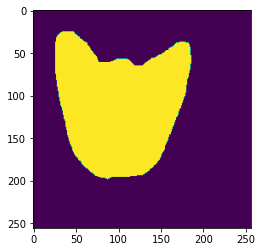

In [30]:
sample = train_dataset[0]
print(sample["image"].shape)
plt.imshow(sample["image"].transpose(1, 2, 0))
plt.imshow(sample["mask"].squeeze())
plt.show()

In [ ]:
class PetModel(pl.LightningModule):
    def __init__(self, arch, encoder_name, in_channels, out_classes, **kwargs):
        super().__init__()
        self.model = smp.create_model(
            arch, encoder_name=encoder_name, in_channels=in_channels, classes=out_classes, **kwargs
        )
        
        params = smp.encoders.get_preprocessing_params(encoder_name)
        self.register_buffer("std", torch.tensor(params["std"]).view(1, 3, 1, 1))
        self.register_buffer("mean", torch.tensor(params["mean"]).view(1, 3, 1, 1))

        self.loss_fn = smp.losses.DiceLoss()